In [68]:
%pylab
%matplotlib inline
from sdca import *
from sklearn import svm
from sklearn import preprocessing

def adapt_svm(A, lambd, num_effective_passes, obj , init_size,init_itr, verbose=False):
  #each row contains a data point with dim d
  # active_stargey: case -1 (nothing), case 1 (reset the block list in each iteration), case 2 ( holding a queue with a limited size), case 3 (online random permutation replacement) 
  inv_sq_row_norms = np.divide(1.0, np.square(np.linalg.norm(A, axis=1)))
  n, d = A.shape
  rperm = np.random.permutation(n);
  alpha = np.zeros(n)
  w = w_alpha(alpha,A,lambd)
  obj_value = obj(w,alpha,A,lambd)
  if verbose:
    print(" Initial objective value: {}".format(obj_value))
  past_ef_pass = 0
  stats = [(0.0, obj_value)]
  completed_effective_passes = 0.0
  past_w = w
  past_obj = obj_value
  sample_size = init_size
  itr = 0
  while completed_effective_passes < num_effective_passes:
    itr = itr + 1 
    if sample_size == init_size: 
      if(itr>init_itr) : 
        itr = 0 
        sample_size = int(2*sample_size)
        sample_size = min(n,sample_size)
        #w = w_alpha(alpha,A,lambd)
        obj_value =  obj(w,alpha,A,lambd)
        print("SWITCHING=============== lambda = {},obj ={}".format(lambd,obj_value))
#     elif itr > 3:
#      itr = 0 
#      sample_size = int(2*sample_size)
#      sample_size = min(n,sample_size)
     #w = w_alpha(alpha,A,lambd)
    lambd = 1.0/sample_size
    coords = rperm[np.random.permutation(sample_size)] 
    for ii in coords:
        alpha_i_old = alpha[ii]
        xi = A[ii,:]
        inv_sqi = inv_sq_row_norms[ii]
        # coordinate update step 
        delta_alpha_i = max(0,min(1,(lambd*sample_size*(1-np.dot(xi,w))*inv_sqi)+alpha_i_old)) - alpha_i_old 
        # update the dual and primal paramters
        alpha[ii] = alpha[ii] + delta_alpha_i
        w = w + delta_alpha_i*xi/(lambd*sample_size)
     
    past_ef_pass = completed_effective_passes
    completed_effective_passes += len(coords) / float(n)
    obj_value = obj(w,alpha,A,1.0/n)
#     obj_value = primal_func(w,A,lambd)
    stats.append((completed_effective_passes, obj_value))
    if verbose:
       print('completed passe:{}, obj:{},norm_w:{},delta_alpha_i:{}'.format(completed_effective_passes,obj_value,np.linalg.norm(w),delta_alpha_i))
    past_w = w 
    past_obj = obj_value
  return (alpha, stats,w)


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [63]:
%pylab
%matplotlib inline
from sdca import *
from sklearn import svm
from sklearn import preprocessing

def adaptreg_svm(A, num_effective_passes, obj, init_lambda,init_itr, verbose=False):
  #each row contains a data point with dim d
  # active_stargey: case -1 (nothing), case 1 (reset the block list in each iteration), case 2 ( holding a queue with a limited size), case 3 (online random permutation replacement) 
  inv_sq_row_norms = np.divide(1.0, np.square(np.linalg.norm(A, axis=1)))
  n, d = A.shape
  lambd = init_lambda
  rperm = np.random.permutation(n);
  alpha = np.zeros(n)
  w = w_alpha(alpha,A,lambd)
  obj_value = obj(w,alpha,A,lambd)
  if verbose:
    print(" Initial objective value: {}".format(obj_value))
  past_ef_pass = 0
  stats = [(0.0, obj_value)]
  completed_effective_passes = 0.0
  
  itr = 0
  while completed_effective_passes < num_effective_passes:
    itr = itr + 1 
    if lambd == init_lambda: 
      if(itr>init_itr) : 
        itr = 0 
        lambd =  max(lambd/2.0,1.0/n)
        w = w_alpha(alpha,A,lambd)
        obj_value =  obj(w,alpha,A,lambd)
        print("SWITCHING=============== lambda = {},obj ={}".format(lambd,obj_value))
    elif itr > 0:
      itr = 0 
      lambd = max(lambd/2.0,1.0/n)
      w = w_alpha(alpha,A,lambd)
      obj_value =  obj(w,alpha,A,lambd)
      print("SWITCHING=============== lambda = {},obj ={}".format(lambd,obj_value))
    coords = rperm[np.random.permutation(n)]
    for ii in coords:
        alpha_i_old = alpha[ii]
        xi = A[ii,:]
        inv_sqi = inv_sq_row_norms[ii]
        # coordinate update step 
        delta_alpha_i = max(0,min(1,(lambd*n*(1-np.dot(xi,w))*inv_sqi)+alpha_i_old)) - alpha_i_old 
        # update the dual and primal paramters
        alpha[ii] = alpha[ii] + delta_alpha_i
        w = w + delta_alpha_i*xi/(lambd*n)
     
    past_ef_pass = completed_effective_passes
    completed_effective_passes += len(coords) / float(n)
    obj_value =  obj(w,alpha,A,lambd)
#     obj_value = primal_func(w,A,lambd)
    stats.append((completed_effective_passes, obj_value))
    if verbose:
       print('completed passe:{}, obj:{},norm_w:{},delta_alpha_i:{}'.format(completed_effective_passes,obj_value,np.linalg.norm(w),delta_alpha_i))
  return (alpha, stats,w)


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [64]:
def adaptsam_svm(A, num_effective_passes, obj, init_sample,init_itr, verbose=False):
  #each row contains a data point with dim d
  # active_stargey: case -1 (nothing), case 1 (reset the block list in each iteration), case 2 ( holding a queue with a limited size), case 3 (online random permutation replacement) 
  inv_sq_row_norms = np.divide(1.0, np.square(np.linalg.norm(A, axis=1)))
  n, d = A.shape
  lambd = 1.0/n
  rperm = np.random.permutation(n);
  alpha = np.zeros(n)
  w = w_alpha(alpha,A,lambd)
  obj_value = obj(w,alpha,A,lambd)
  if verbose:
    print(" Initial objective value: {}".format(obj_value))
  past_ef_pass = 0
  stats = [(0.0, obj_value)]
  completed_effective_passes = 0.0
  
  itr = 0
  sample_size = init_sample
  while completed_effective_passes < num_effective_passes:
    itr = itr + 1 
#     if lambd == init_lambda: 
#       if(itr>init_itr) : 
#         itr = 0 
#         lambd =  max(lambd/2.0,1.0/n)
#         w = w_alpha(alpha,A,lambd)
#         obj_value =  obj(w,alpha,A,lambd)
#         print("SWITCHING=============== lambda = {},obj ={}".format(lambd,obj_value))
#     elif itr > 0:
#       itr = 0 
#       lambd = max(lambd/2.0,1.0/n)
#       w = w_alpha(alpha,A,lambd)
#       obj_value =  obj(w,alpha,A,lambd)
#       print("SWITCHING=============== lambda = {},obj ={}".format(lambd,obj_value))
    coords = rperm[np.random.permutation(sample_size)]
    for ii in coords:
        alpha_i_old = alpha[ii]
        xi = A[ii,:]
        inv_sqi = inv_sq_row_norms[ii]
        # coordinate update step 
        delta_alpha_i = max(0,min(1,(lambd*sample_size*(1-np.dot(xi,w))*inv_sqi)+alpha_i_old)) - alpha_i_old 
        # update the dual and primal paramters
        alpha[ii] = alpha[ii] + delta_alpha_i
        w = w + delta_alpha_i*xi/(lambd*sample_size)
     
    past_ef_pass = completed_effective_passes
    completed_effective_passes += len(coords) / float(n)
    obj_value =  obj(w,alpha,A,lambd)
#     obj_value = primal_func(w,A,lambd)
    stats.append((completed_effective_passes, obj_value))
    if verbose:
       print('completed passe:{}, obj:{},norm_w:{},delta_alpha_i:{}'.format(completed_effective_passes,obj_value,np.linalg.norm(w),delta_alpha_i))
  return (alpha, stats,w)


In [69]:
def run_small_experiment(X,y,A_in,lambd,passes,plotname,primal_opt = -1,primal_accuracy = False):
    N,d = A_in.shape
    #if primal_opt == -1:
    #    clf = svm.LinearSVC(loss = 'hinge', C = 1.0/(N*lambd),fit_intercept=False, tol=1e-6, max_iter=N*passes*20)
    #    clf.fit(X, y)
    #    primal_opt =  primal_func(clf.coef_,A_in,lambd)

    lambd = 1.0/N
    clf = svm.LinearSVC(loss = 'hinge', C = 1.0, tol = 0.000000001, max_iter = 1000000000, fit_intercept=False)
    clf.fit(X, y)
    primal_opt =  primal_func(clf.coef_,A_in,1.0/N)
    print("primal obj={}".format(primal_opt))
    
    def dist_opt(w,alpha,A,lambd):
      if primal_accuracy == True: 
        return primal_func(w,A,1.0/N) - primal_opt
      return primal_opt - dual_obj(w, alpha,A,1.0/N)
        #da = 0
        #for i in range(n): 
        #    if alpha[i] <= 1 and alpha[i] >= 0:
        #        da = da + alpha[i]
        #    else:
        #        da = da + float("inf")
        #da = da / n 
        #da = da - 0.5*lambd*np.square(((1.0*n)/N)*np.linalg.norm(w_alpha(alpha,A,lambd)))
        #return primal_opt - da
    
    (alpha_n,stats_n,w_n) =svm_randomperm( A_in, 1.0/N, passes, obj = dist_opt)
    t_perm, f_perm = get_data_plot(stats_n)
    plabel = 'rperm'
    plt.plot(t_perm,np.log2(f_perm),label = plabel, marker='o')
    lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    (alpha_n,stats_n,w_n) = adapt_svm(A=A_in, lambd = 1.0/n,num_effective_passes = passes, obj= dist_opt , init_size = int(N/5.0),init_itr = 30,verbose=True)
    #(alpha_n,stats_n,w_n) = adaptreg_svm(A=A_in, num_effective_passes = passes, obj=dist_opt , init_lambda = 0.0005,init_itr = 3,verbose=True)
    #(alpha_n,stats_n,w_n) = adaptsam_svm(A=A_in, num_effective_passes=passes, obj=dist_opt, init_sample= int(N/4),init_itr = 10)
    t_adapt, f_adapt = get_data_plot(stats_n)
    plabel = 'adaptive'
    plt.plot(t_adapt,np.log2(f_adapt),label = plabel, marker='o')
    lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
    plt.savefig(plotname, facecolor='w', edgecolor='w',
        orientation='portrait',  format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

primal obj=[ 0.35115039]
 Initial objective value: [ 0.64884961]
completed passe:0.199993857683, obj:[ 0.12908565],norm_w:3.89681743576,delta_alpha_i:0.0266620463755
completed passe:0.399987715365, obj:[ 0.08797661],norm_w:3.26735988353,delta_alpha_i:0.0
completed passe:0.599981573048, obj:[ 0.22076332],norm_w:3.30631720855,delta_alpha_i:0.0
completed passe:0.79997543073, obj:[ 0.12050802],norm_w:3.44601594961,delta_alpha_i:0.0
completed passe:0.999969288413, obj:[ 0.06585336],norm_w:3.59757467092,delta_alpha_i:-0.0248597228094
completed passe:1.1999631461, obj:[ 0.0557983],norm_w:3.84668489213,delta_alpha_i:0.0
completed passe:1.39995700378, obj:[ 0.07522651],norm_w:3.50428369663,delta_alpha_i:0.0470554597914
completed passe:1.59995086146, obj:[ 0.18961061],norm_w:3.75913567286,delta_alpha_i:0.0
completed passe:1.79994471914, obj:[ 0.06738646],norm_w:3.87115543079,delta_alpha_i:0.00755269205866
completed passe:1.99993857683, obj:[ 0.06386641],norm_w:3.83354944355,delta_alpha_i:0.0
com

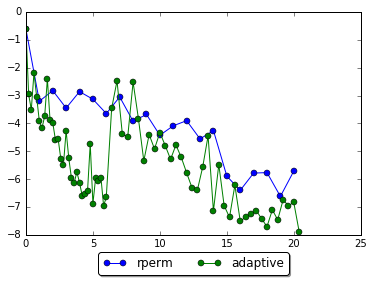

In [70]:
n = 32561; 
d = 123; 
import readsvm 
#filename = "../datasets/rcv1_train.binary"
filename = "../datasets/a9a"
y, X = readfile(filename,n,d)
#X = preprocessing.scale(X)
A = np.zeros((n,d))
for i in range(n): 
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
    A[i,:] = y[i]*X[i,:]
lambd = 1.0/n
passes = 20
run_small_experiment(X,y, A,lambd,passes,"plot/a9a_primal_samreg.eps",primal_accuracy=True)

primal obj=[ 0.35115039]
 Initial objective value: [ 0.35115039]
completed passe:0.199993857683, obj:[ 0.34420747],norm_w:3.80178254749,delta_alpha_i:0.147248195625
completed passe:0.399987715365, obj:[ 0.33781054],norm_w:2.95544841892,delta_alpha_i:0.0
completed passe:0.599981573048, obj:[ 0.33178458],norm_w:3.30414956279,delta_alpha_i:-0.00286692925502
completed passe:0.79997543073, obj:[ 0.32563355],norm_w:3.44323101765,delta_alpha_i:0.00966351661464
completed passe:0.999969288413, obj:[ 0.31968448],norm_w:3.63697160332,delta_alpha_i:-0.00774766355327
completed passe:1.1999631461, obj:[ 0.31410859],norm_w:3.74499300804,delta_alpha_i:0.0
completed passe:1.39995700378, obj:[ 0.30898223],norm_w:3.78774831716,delta_alpha_i:0.107107507398
completed passe:1.59995086146, obj:[ 0.30440366],norm_w:4.05046108659,delta_alpha_i:0.0238282065427
completed passe:1.79994471914, obj:[ 0.30038474],norm_w:4.0287616808,delta_alpha_i:0.0
completed passe:1.99993857683, obj:[ 0.29713115],norm_w:3.85184166

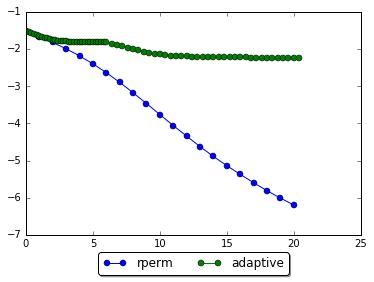

In [72]:
n = 32561; 
d = 123; 
import readsvm 
#filename = "../datasets/rcv1_train.binary"
filename = "../datasets/a9a"
y, X = readfile(filename,n,d)
#X = preprocessing.scale(X)
A = np.zeros((n,d))
for i in range(n): 
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
    A[i,:] = y[i]*X[i,:]
lambd = 1.0/n
passes = 20
run_small_experiment(X,y, A,lambd,passes,"plot/a9a_dual_samreg.eps",primal_accuracy=False)

primal obj=[ 0.13276421]
 Initial objective value: [ 0.13276421]
completed passe:0.199983919275, obj:[ 0.11130864],norm_w:13.1563888412,delta_alpha_i:0.0
completed passe:0.39996783855, obj:[ 0.10849138],norm_w:12.5212840436,delta_alpha_i:0.0
completed passe:0.599951757824, obj:[ 0.10703384],norm_w:13.2356299535,delta_alpha_i:0.0
completed passe:0.799935677099, obj:[ 0.10616683],norm_w:13.9667157399,delta_alpha_i:0.0
completed passe:0.999919596374, obj:[ 0.10568999],norm_w:14.1920343758,delta_alpha_i:0.0
completed passe:1.19990351565, obj:[ 0.10542284],norm_w:14.4057102159,delta_alpha_i:0.0
completed passe:1.39988743492, obj:[ 0.10524981],norm_w:14.5730290521,delta_alpha_i:0.0
completed passe:1.5998713542, obj:[ 0.10512563],norm_w:14.6834209493,delta_alpha_i:0.0
completed passe:1.79985527347, obj:[ 0.10503629],norm_w:14.8194572744,delta_alpha_i:0.0
completed passe:1.99983919275, obj:[ 0.10496326],norm_w:14.7896961856,delta_alpha_i:0.0
completed passe:2.19982311202, obj:[ 0.10491654],nor

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


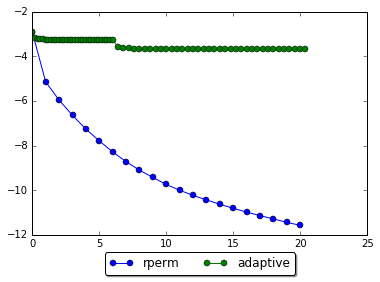

In [73]:
n = 49749; 
d = 300; 
filename = "../datasets/w8a"
y, X = readfile(filename,n,d)
A = np.zeros((n,d))
for i in range(n):
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
    A[i,:] = y[i]*X[i,:]
lambd = 1.0/n
passes = 20
run_small_experiment(X,y, A,lambd,passes,"plot/w8a_dual_samreg.eps",primal_accuracy = False)

primal obj=[ 0.13276421]
 Initial objective value: [ 0.86723579]
completed passe:0.199983919275, obj:[ 0.03579135],norm_w:13.3239470631,delta_alpha_i:0.0
completed passe:0.39996783855, obj:[ 0.02549372],norm_w:12.896745597,delta_alpha_i:0.0
completed passe:0.599951757824, obj:[ 0.01784093],norm_w:13.5404459706,delta_alpha_i:0.0
completed passe:0.799935677099, obj:[ 0.0177163],norm_w:14.0864938229,delta_alpha_i:0.0
completed passe:0.999919596374, obj:[ 0.02318512],norm_w:14.2982337186,delta_alpha_i:0.0
completed passe:1.19990351565, obj:[ 0.01883136],norm_w:14.341913461,delta_alpha_i:0.0
completed passe:1.39988743492, obj:[ 0.01351628],norm_w:14.509794905,delta_alpha_i:0.0
completed passe:1.5998713542, obj:[ 0.01366707],norm_w:14.5701045131,delta_alpha_i:0.0
completed passe:1.79985527347, obj:[ 0.01411322],norm_w:14.626739116,delta_alpha_i:0.0
completed passe:1.99983919275, obj:[ 0.01329339],norm_w:14.7508845334,delta_alpha_i:0.0
completed passe:2.19982311202, obj:[ 0.01344797],norm_w:1

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide


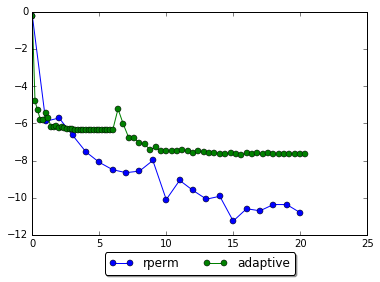

In [77]:
n = 49749; 
d = 300; 
filename = "../datasets/w8a"
y, X = readfile(filename,n,d)
A = np.zeros((n,d))
for i in range(n):
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
    A[i,:] = y[i]*X[i,:]
lambd = 1.0/n
passes = 20
run_small_experiment(X,y, A,lambd,passes,"plot/w8a_primal_samreg.eps",primal_accuracy = True)

primal obj=[ 0.350502]
 Initial objective value: [ 0.649498]
completed passe:0.199996008064, obj:[ 0.1449331],norm_w:10.4117336736,delta_alpha_i:0.0
completed passe:0.399992016127, obj:[ 0.07467391],norm_w:9.59837442088,delta_alpha_i:0.0
completed passe:0.599988024191, obj:[ 0.04925712],norm_w:9.58436215376,delta_alpha_i:0.150598257928
completed passe:0.799984032255, obj:[ 0.03818107],norm_w:10.3046147658,delta_alpha_i:0.0
completed passe:0.999980040319, obj:[ 0.01382696],norm_w:10.8333092367,delta_alpha_i:0.0
completed passe:1.19997604838, obj:[ 0.01449866],norm_w:11.36597673,delta_alpha_i:0.0502517166272
completed passe:1.39997205645, obj:[ 0.01254192],norm_w:11.6766327189,delta_alpha_i:0.0
completed passe:1.59996806451, obj:[ 0.01096263],norm_w:12.1438049488,delta_alpha_i:0.0
completed passe:1.79996407257, obj:[ 0.00999177],norm_w:12.196666909,delta_alpha_i:0.0
completed passe:1.99996008064, obj:[ 0.00609218],norm_w:12.4821434182,delta_alpha_i:0.0
completed passe:2.1999560887, obj:[

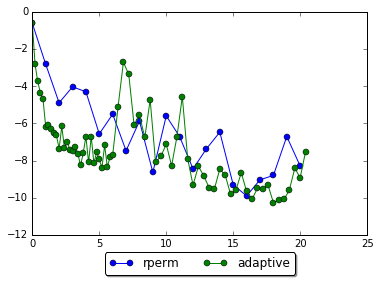

In [78]:
n = 50101; 
d = 54; 
filename = "../datasets/covtype.libsvm.binary.scale"
y, X = readfile(filename,n,d)
A = np.zeros((n,d))
for i in range(n):
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
    A[i,:] = y[i]*X[i,:]
lambd = 1.0/n
passes = 20
run_small_experiment(X,y, A,lambd,passes,"plot/covtype_primal_samreg.eps",primal_accuracy = True)

primal obj=[ 0.350502]
 Initial objective value: [ 0.350502]
completed passe:0.199996008064, obj:[ 0.32899416],norm_w:9.91637694109,delta_alpha_i:0.34510945562
completed passe:0.399992016127, obj:[ 0.31071561],norm_w:9.58031998851,delta_alpha_i:0.0
completed passe:0.599988024191, obj:[ 0.29826174],norm_w:10.2407341447,delta_alpha_i:-0.0247158103188
completed passe:0.799984032255, obj:[ 0.29094214],norm_w:10.6533309237,delta_alpha_i:0.20719886452
completed passe:0.999980040319, obj:[ 0.28702196],norm_w:10.9949551497,delta_alpha_i:0.0
completed passe:1.19997604838, obj:[ 0.28459164],norm_w:11.4126210668,delta_alpha_i:0.218762821419
completed passe:1.39997205645, obj:[ 0.28302085],norm_w:11.9325693893,delta_alpha_i:0.0
completed passe:1.59996806451, obj:[ 0.28192659],norm_w:12.4642033995,delta_alpha_i:0.0
completed passe:1.79996407257, obj:[ 0.28113298],norm_w:12.7106448953,delta_alpha_i:0.0
completed passe:1.99996008064, obj:[ 0.28055627],norm_w:12.837692875,delta_alpha_i:0.087738827478


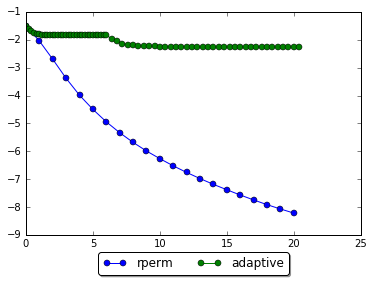

In [79]:
n = 50101; 
d = 54; 
filename = "../datasets/covtype.libsvm.binary.scale"
y, X = readfile(filename,n,d)
A = np.zeros((n,d))
for i in range(n):
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
    A[i,:] = y[i]*X[i,:]
lambd = 1.0/n
passes = 20
run_small_experiment(X,y, A,lambd,passes,"plot/covtype_dual_samreg.eps",primal_accuracy = False)